# Kaggle Data Visualization
- Make great data visualizations. A great way to see the power of coding!

## 7. Exercise: Final Project
- trend: .lineplot()
- Relationship: . barplot(), .heatmap(), .scatterplot(), regplot(), .lmplot(), .swarmplot()
- Distribution: .histoplot(), .kdeplot(), jointplot()

### 0.- Content
1.0.- Import libraries and read zipfile & dataset content
1.1.- Read data. Take first look
1.2.- Exploring the data
2.0.- Direct Graphs
2.1.- .lineplot()


### 1.0.- Import libraries and read zipfile & dataset content

In [26]:
import zipfile as zfm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

zipfile = 'BankCustChurn.zip'
dataset = 'Bank Customer Churn Prediction.csv'

# dir(zfm.ZipFile)
with zfm.ZipFile(zipfile) as zf:
    # datasets = zf.infolist()
    datasets = zf.namelist()
    # datasets = zf.getinfo(name='fifa.csv')
    if dataset in zf.namelist():
        print(f'Dataset "{dataset}" founded in "{zipfile}"')
        # to see first dataset lines (first lines -cols- to found possible index)
        numln = 1
        for ln in zf.open(dataset):
            print(ln)
            if numln == 4: break
            numln += 1

Dataset "Bank Customer Churn Prediction.csv" founded in "BankCustChurn.zip"
b'customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn\r\n'
b'15634602,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n'
b'15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n'
b'15619304,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n'


##### Each customer has the following attriutes:
1. Customer ID - The Unique ID of each individual customer
2. Credit Score - A number depicting the customer’s credithworthiness
3. Country - The country the customer banks from
4. Gender - The gender the customer identifies with
5. Age - Depicts the customers age
6. Tenure - Indicates how length in years the customer has been with the bank
7. Balance - The amount currently available in the customer’s account
8. Products Number - The number of products purchased by the customer through the bank
9. Credit Card - Indicates the customer has a credit card
10. Active Member - Indicates if the customer is an active or inactive
11. Estimated Salary - Bank Estimation of the income of the customer
12. Churn - Indicator of if the customer has left the bank or not

### 1.1.- Read data. Take first look

In [27]:
with zfm.ZipFile(zipfile) as zf:
    df = pd.read_csv(zf.open(dataset))
print(df.shape)
df.iloc[[0, 5, 9, -9, -5, -1]]

(10000, 12)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### 1.2.- Exploring the data

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [29]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 2.0.- Direct Charts
- Graphics derived directly from the data format.
- The df is a long-form dataset, each row is an observation and each col is a variable (12 variables).
- Direct Charts for long-format: .relplot(), .lineplot(), 
- Line Charts, .lineplot(), no very clear.
- Heatmap, .heatplot(), 

#### 2.1.- Line Charts
- .lineplot(): visualize trend (usually over time).
- Some trends over customers_id

Text(0.5, 0, '')

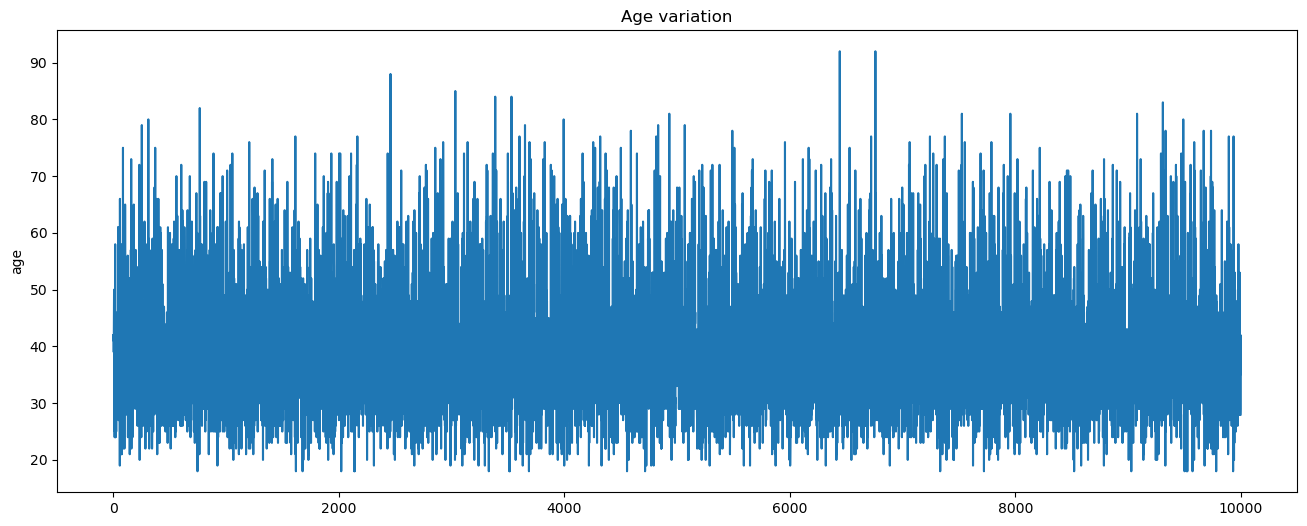

In [30]:
# age trend - index x_axis
fig, axl1 = plt.subplots(figsize=(16,6))
sns.lineplot(data=df['age'], ax=axl1)
axl1.set_title("Age variation")
axl1.set_xlabel(df.index.name)

Text(0.5, 0, 'customer_id')

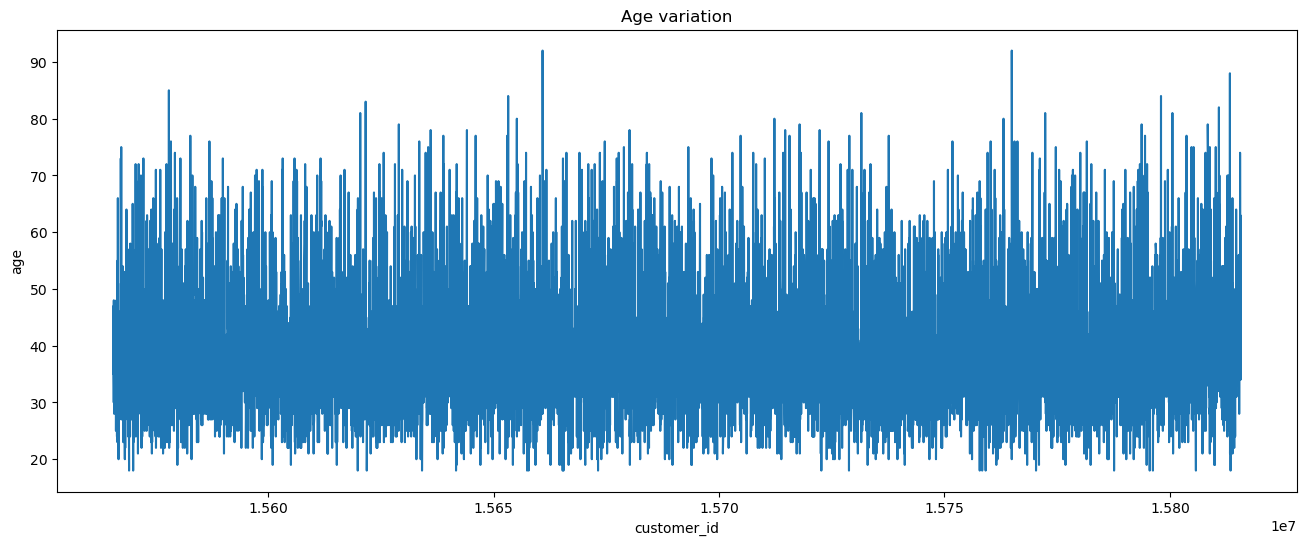

In [32]:
# age trend - custormer_id x_axis
fig, axl1 = plt.subplots(figsize=(16,6))
sns.lineplot(data=df, x='customer_id', y='age', ax=axl1)
axl1.set_title("Age variation")
axl1.set_xlabel(df.customer_id.name)

## 2. Bar Charts (and Pie Charts)
- Comparing quantities corresponding to different groups.
- in long-format table mk value_counts() or grupby()
#### Bank Customers vs Country
- value_counts of country
- .barchart value_counts by country

In [15]:
df.country.value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [16]:
### sns.barplot a serie -> a function for diff cols
def bars_value_counts(col):
    vc = df[col].value_counts()
    if len(vc.index) > 5:
        lenght, hight = 12, 6
        rot = 90
    else:
        lenght, hight = 6, 4
        rot = 0
    fig, axe = plt.subplots(figsize=(lenght, hight))
    sns.barplot(x=vc.index, y=vc, ax=axe)
    axe.set_xticklabels(vc.index, rotation=rot)

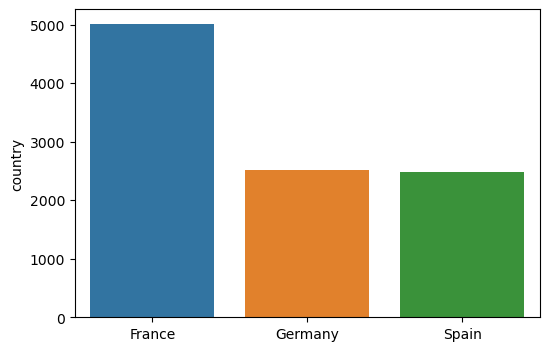

In [17]:
bars_value_counts('country')

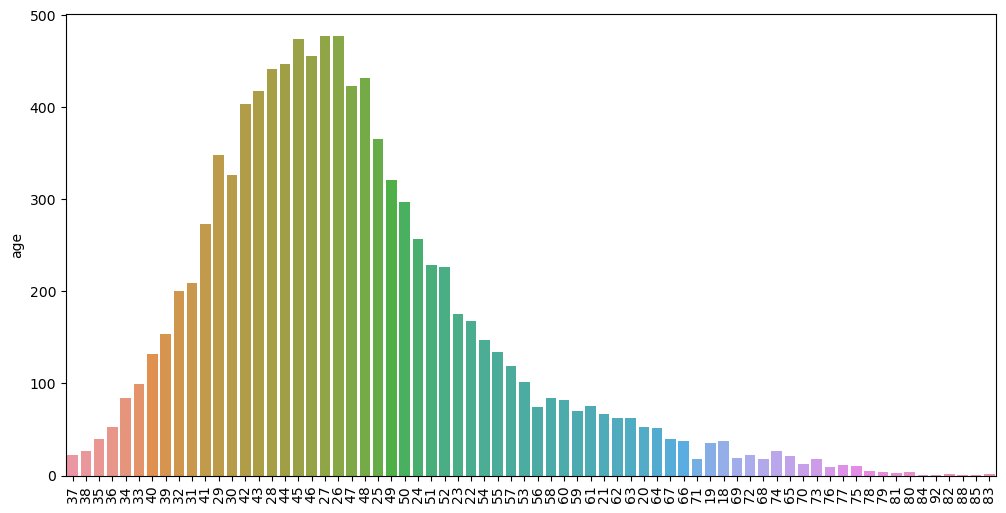

In [18]:
bars_value_counts('age')

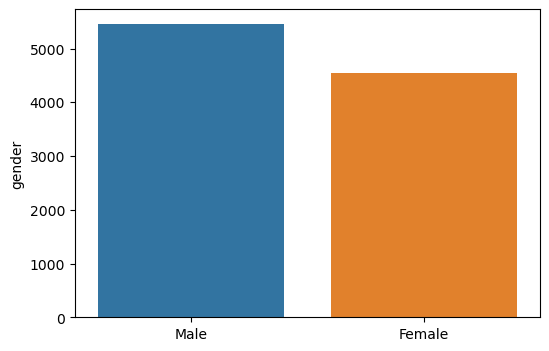

In [63]:
bars_value_counts('gender')

In [64]:
# d1 = df.groupby('country')
# d1.first()
# df.groupby('country').count()

In [89]:
### Funct. to show pie plots 
def func(pct, allvalues):
    #absolute = int(pct / 100.*np.sum(allvalues))
    absolute = int(pct / 100 * np.sum(allvalues))
    #return "{:.1f}%\n({:d} g)".format(pct, absolute)
    return f'{pct:.1f}%\n({absolute:,} custs.)'

def pie_value_counts(col):
    vc = df[col].value_counts()
    aupct = '%.0f%%'    # '%.0f%%'
    colors = sns.color_palette('pastel')[0:5]
    fig, axe = plt.subplots()
    axe.pie(vc, labels=vc.index, colors=colors,
            autopct=lambda pct: func(pct, vc))

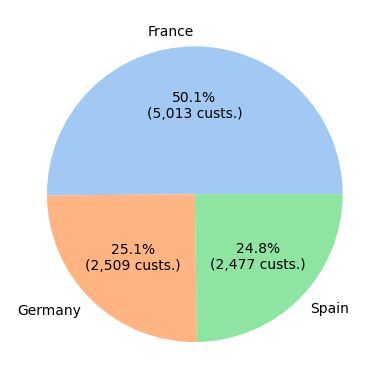

In [90]:
pie_value_counts('country')

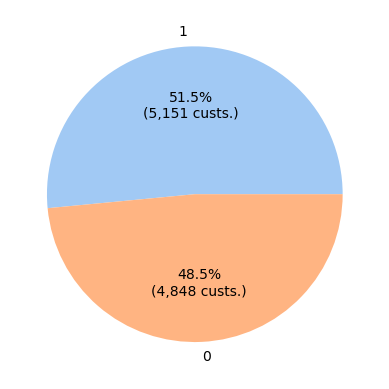

In [92]:
### Customer Activity Status
pie_value_counts('active_member')

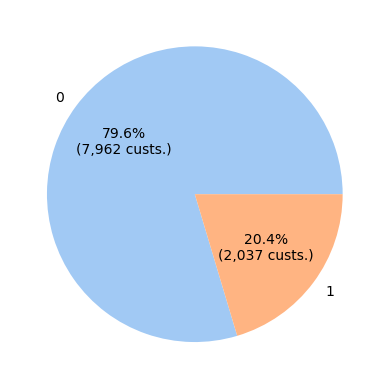

In [93]:
### Customer Retention
pie_value_counts('churn')

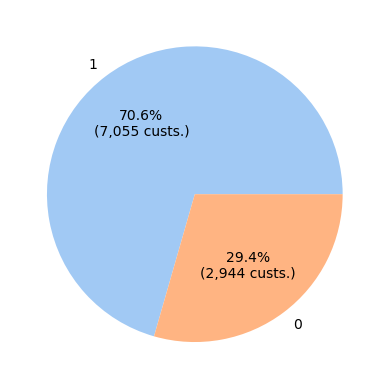

In [94]:
### Customer Credit Card Usage
pie_value_counts('credit_card')

> https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

## 3. Distribution Graphs
- Histograms, KDEplots
- In a long-form data table an histogram for each column is posible

Text(0, 0.5, 'Customer Count')

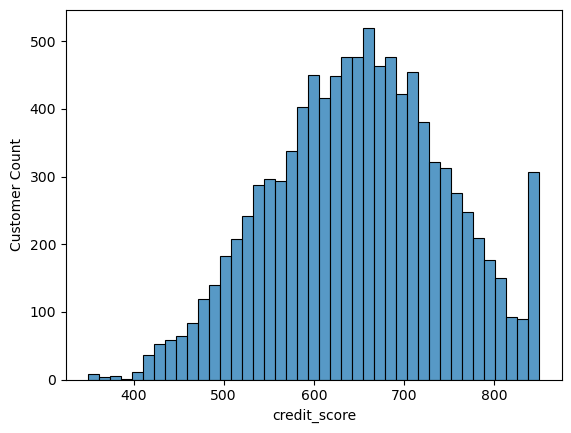

In [32]:
### Bank Customer Credit Scores - credit_score histagram
g = sns.histplot(data=df.credit_score)
g.set_ylabel('Customer Count')

<Axes: xlabel='age', ylabel='Count'>

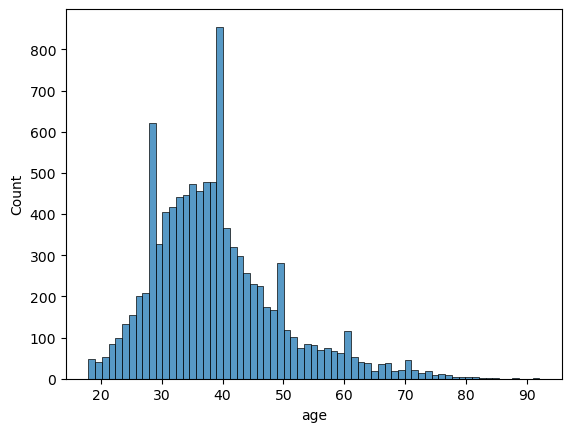

In [31]:
### Customer Ages Histogram
sns.histplot(data=df.age)

### Correlation Heatmap

In [99]:
df.iloc[[0, 5, 9, -9, -5, -1]]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [102]:
# d1 = df[['credit_score', 'age', 'tenure', 'balance']]
# d1

<Axes: >

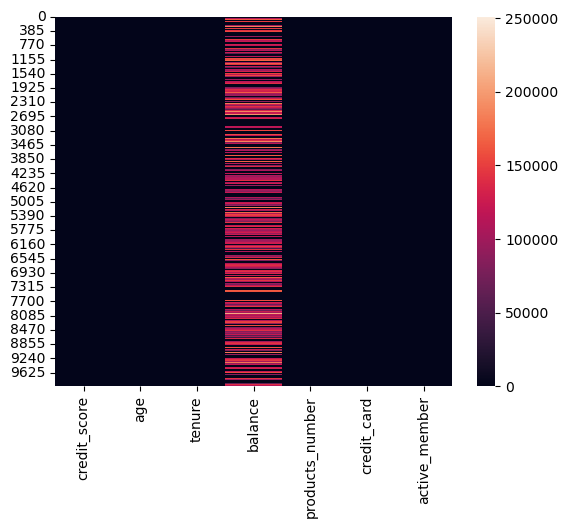

In [104]:
sns.heatmap(data=df[['credit_score', 'age', 'tenure', 'balance',
                     'products_number', 'credit_card', 'active_member']])
## Investigate correlation heapmap fc projects

### Density Plot [mean(), median(), mode()]
- https://rpubs.com/Rvge_mvsrter/939193